# Loading Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import json
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from IPython.display import display, Math, Latex
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.width', 450)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

# Loading Data via function line by line
As we have large amounf data so we are loading data line by line in dataframe business_df, review_df, user_df

In [22]:
import json

def readjson(filepath):
    data = []
    i=0
    with open(filepath,encoding="utf8") as f:
            for line in f:
                 if i<100000:
                    data.append(json.loads(line))
                    #print(i)
                    i +=1
    return pd.DataFrame(data)

business_df = readjson('./dataset/business.json')
review_df = readjson('./dataset/review.json')
user_df = readjson('./dataset/user.json')

# Filtering data
Getting reaturants out of business dataframe based on Food category

In [23]:
business_df['categories'] = business_df['categories'].astype(str)
restaurant_df = business_df[business_df['categories'].str.contains('Food')==True]

complete_df = restaurant_df.merge(review_df,on='business_id').merge(user_df,on='user_id')


In [24]:
complete_df.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name_x,neighborhood,postal_code,review_count_x,stars_x,state,cool_x,date,funny_x,review_id,stars_y,text,useful_x,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool_y,elite,fans,friends,funny_y,name_y,review_count_y,useful_y,yelping_since
0,"1203 E Charleston Blvd, Ste 140","{'BusinessParking': {'validated': False, 'gara...",YTqtM2WFhcMZGeAGA08Cfg,"['Seafood', 'Restaurants', 'Specialty Food', '...",Las Vegas,"{'Sunday': '10:15-21:00', 'Wednesday': '10:30-...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV,0,2016-09-16,1,ZH8g_PoY0Tr3YdQ-RGySrA,5,Great place. There was a man here who was very...,1,EDe16577dBImA1ypOzPlKg,5.00,0,0,0,0,0,0,0,0,0,0,0,0,[],0,[],0,Jessica,1,0,2014-07-26
1,"1203 E Charleston Blvd, Ste 140","{'BusinessParking': {'validated': False, 'gara...",YTqtM2WFhcMZGeAGA08Cfg,"['Seafood', 'Restaurants', 'Specialty Food', '...",Las Vegas,"{'Sunday': '10:15-21:00', 'Wednesday': '10:30-...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV,1,2014-11-13,1,6r2uAJE1dqUq1IHn_3R3qA,4,HOT HOT HOT! Real Mexican Food\n\nNO fake wate...,2,twx2ZgFUbat87vGQ_tFbPA,3.55,0,0,0,2,0,1,3,0,5,0,0,11,[],3,"[eFObFWgDiQJwUiy9WlhOfg, W4KL3Q_AVGfRrWcwR60gK...",29,Edwin,94,317,2010-12-30


In [25]:
restaurant_df.describe()

,is_open,latitude,longitude,review_count,stars
count,18503.00000,18503.000000,18503.000000,18503.000000,18503.000000
mean,0.83073,39.702568,-87.807760,34.804464,3.546857
std,0.37500,5.747548,27.691971,82.946472,0.889710
min,0.00000,-34.520401,-119.551325,3.000000,1.000000
25%,1.00000,35.135615,-112.013439,5.000000,3.000000
50%,1.00000,40.440368,-81.357777,11.000000,3.500000
75%,1.00000,43.665419,-79.414244,31.000000,4.000000
max,1.00000,59.438181,11.769500,3439.000000,5.000000


In [26]:
user_df.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.729684,16.342210,0.950070,16.342210,12.015470,0.416970,1.465460,6.980040,5.491070,15.870480,1.046280,6.151540,91.215580,5.103230,64.731610,66.524450,120.838970
std,0.835715,197.424646,16.639768,197.424646,175.458886,7.165452,15.762362,70.410324,153.225409,194.113025,19.474635,73.883346,1509.129416,29.803631,1049.502721,178.975429,1610.123217
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,3.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,2.000000
75%,4.240000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,3.000000,50.000000,13.000000
max,5.000000,16710.000000,2146.000000,16710.000000,19988.000000,1265.000000,1576.000000,6340.000000,33297.000000,13075.000000,2232.000000,7117.000000,175230.000000,1837.000000,103514.000000,11065.000000,187179.000000


In [27]:
review_df.describe()

,cool,funny,stars,useful
count,100000.000000,100000.000000,100000.000000,100000.00000
mean,0.532470,0.411740,3.730530,1.01213
std,1.992121,1.655608,1.418456,2.46252
min,0.000000,0.000000,1.000000,0.00000
25%,0.000000,0.000000,3.000000,0.00000
50%,0.000000,0.000000,4.000000,0.00000
75%,0.000000,0.000000,5.000000,1.00000
max,104.000000,114.000000,5.000000,113.00000


In [28]:
review_df.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


# EDA
Performing Exploratory data analysis

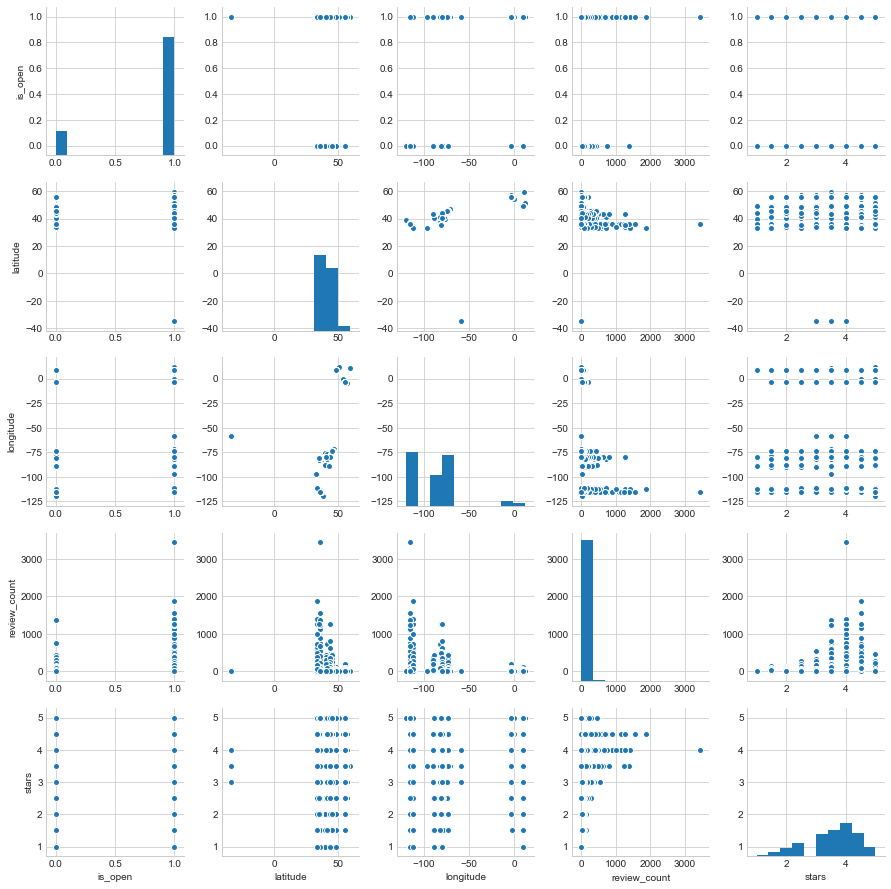

In [30]:
sns.pairplot(restaurant_df.iloc[0:10000,:]);

## Distribution count of Restaurant rating 
We can see below more restaurants get 4 rating than other ratings

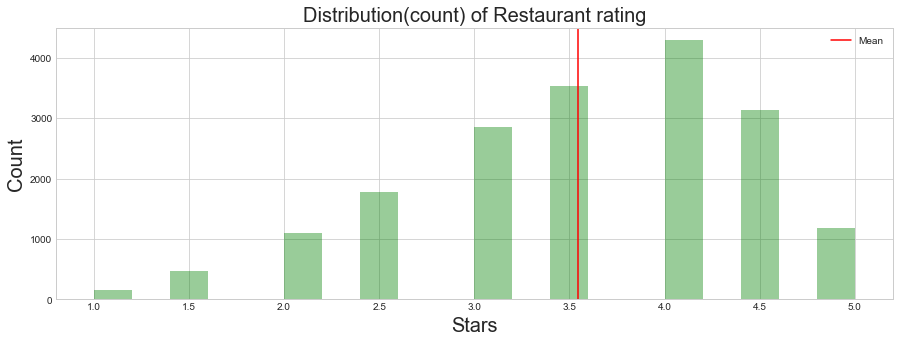

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.distplot(restaurant_df.stars,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(restaurant_df.stars.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20);

## Distribution count of Reviews rating for restaurants 
We can see below more reviews have 5 rating than other ratings

Text(0.5,1,'Distribution(count) of different Reviews rating')

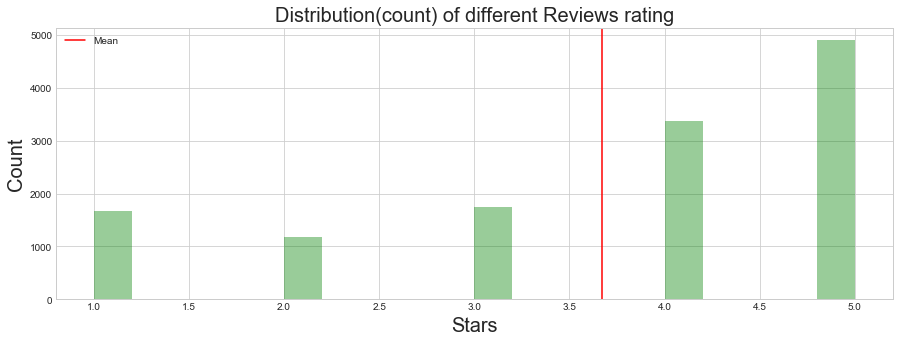

In [32]:
#review just for business which are restautrant
review_df_filter_df = review_df.merge(restaurant_df,how='inner',on='business_id')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(review_df_filter_df.stars_x,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(review_df_filter_df.stars_x.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of different Reviews rating',size=20)

## Distribution count of user rating for restaurants 
We can see below  users have around mean of 3.7  rating

Text(0.5,1,'Distribution(count) of User given rating')

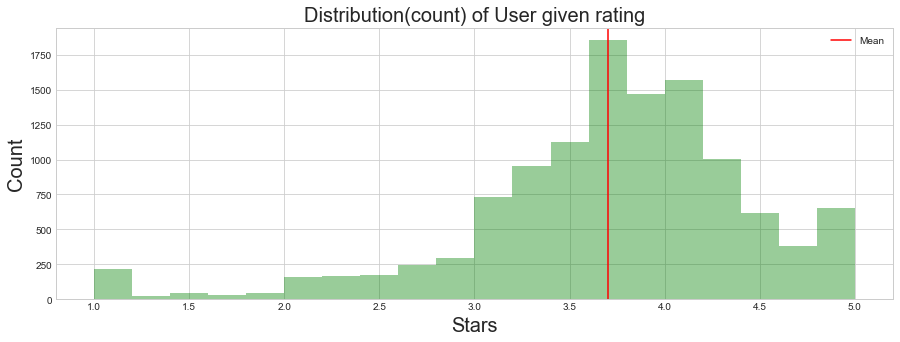

In [33]:
#user just for business which are restautrant
user_df_filter_df = complete_df.groupby(['user_id'],as_index=False).mean()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(user_df_filter_df.average_stars,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(user_df_filter_df.average_stars.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of User given rating',size=20)

#fig.tight_layout()

## Scatter plot various features 
We can see that useful, funny and cool are correlated 

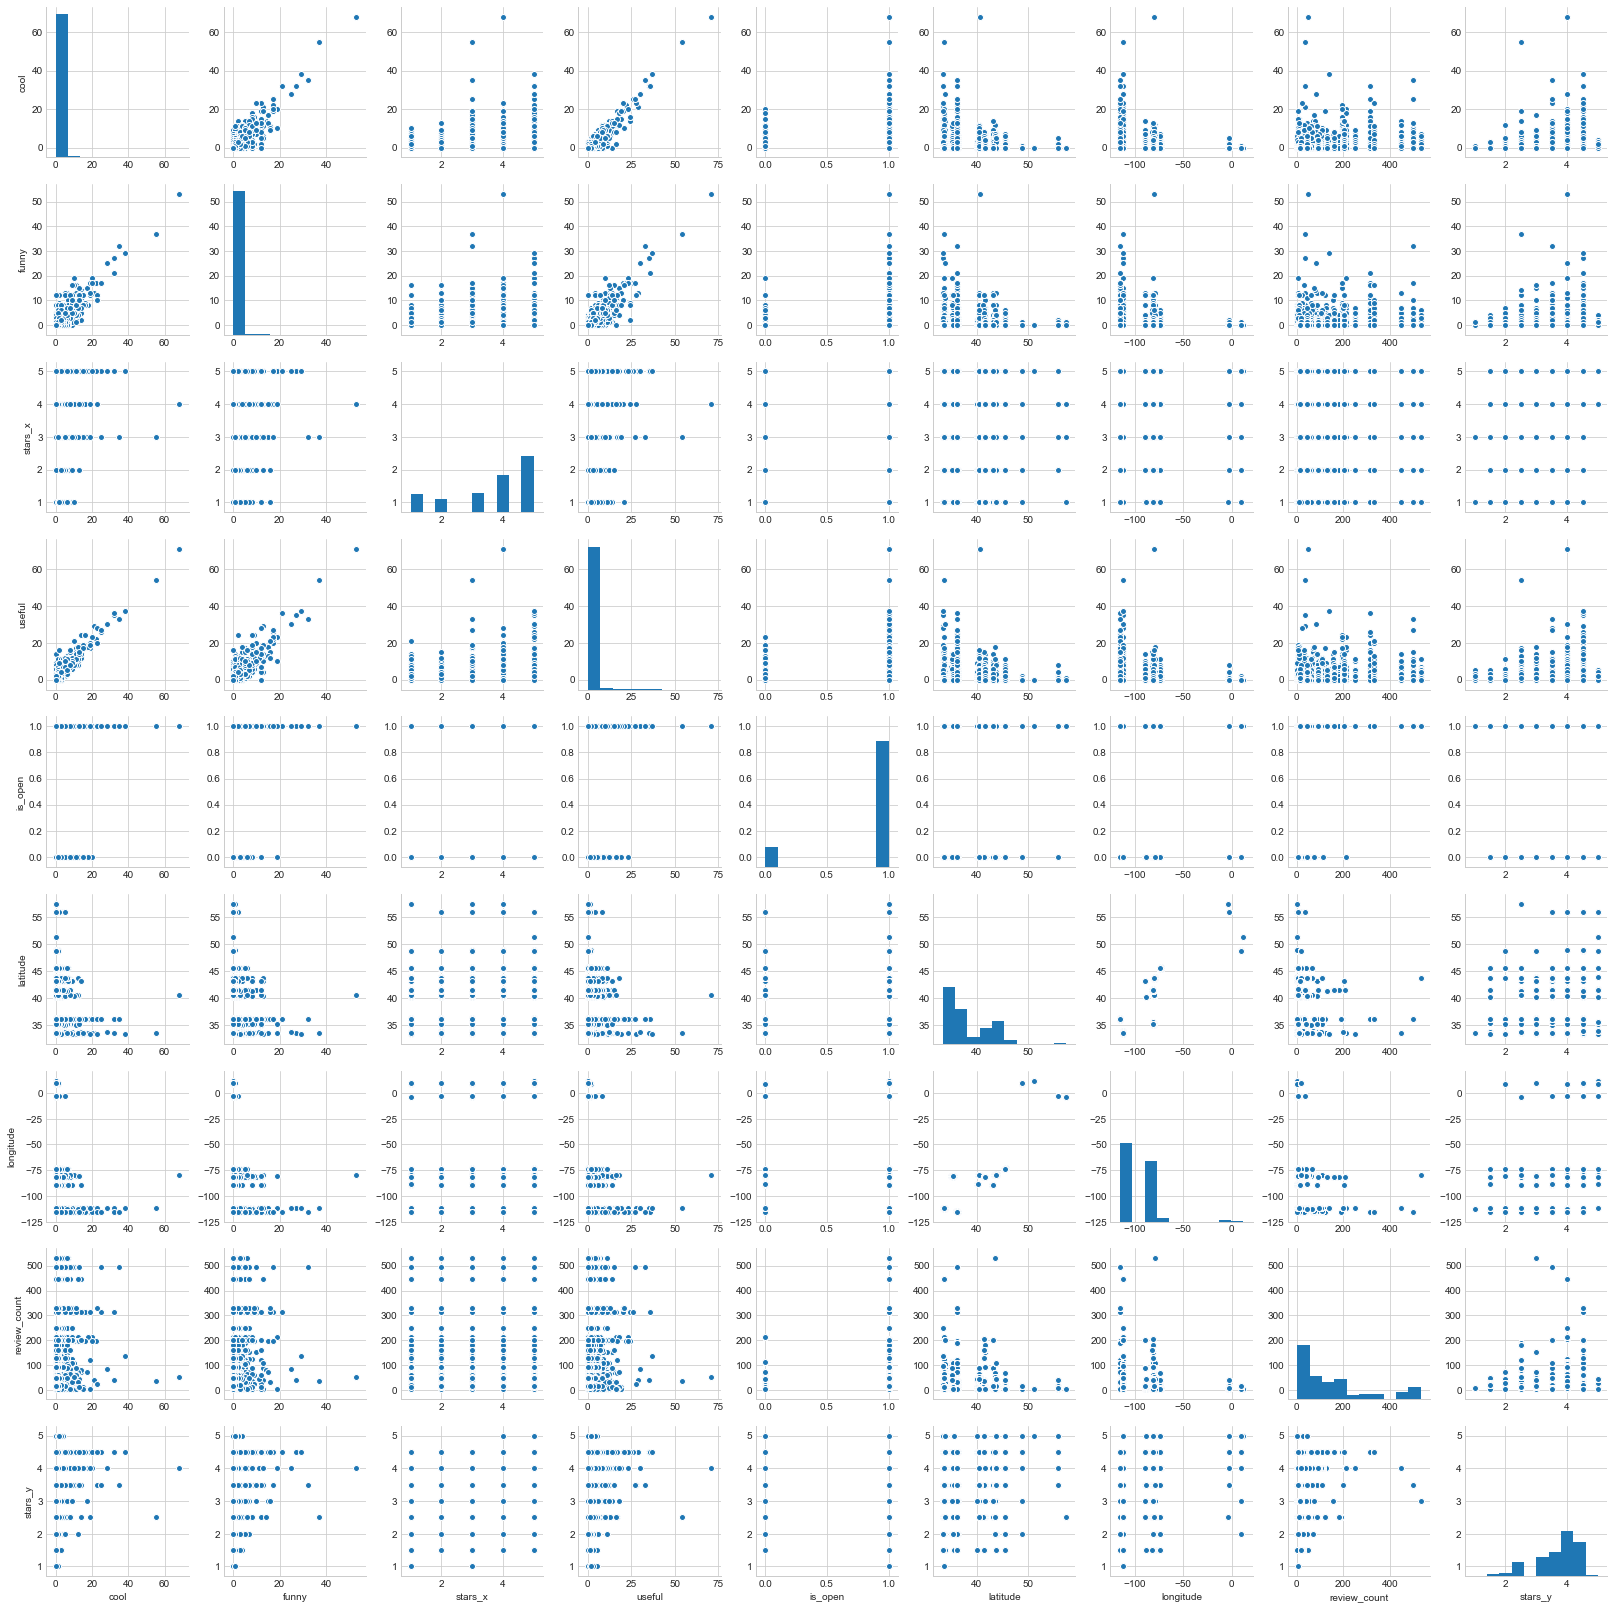

In [34]:
sns.pairplot(review_df_filter_df.iloc[0:10000,:]);


## Most Reviewed Restaurant
Bouchon at the Venezia Tower is reviewed almost double as compared to others

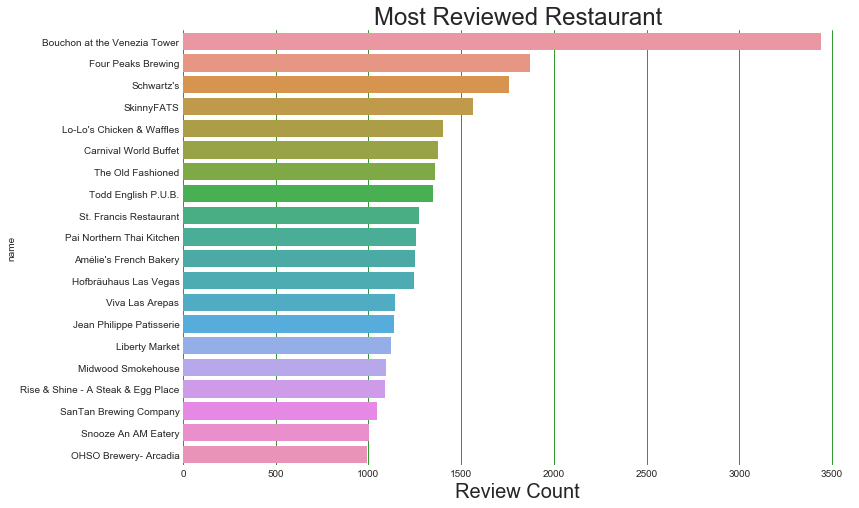

In [35]:
#get top 20 most reviewed restaurants
n_top =20
most_reviewed_restaurant = restaurant_df.nlargest(n_top, 'review_count')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=most_reviewed_restaurant)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Most Reviewed Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)


## Top 10 5 star rated Restaurant
Poke Express is the top 5 star rated restaurant

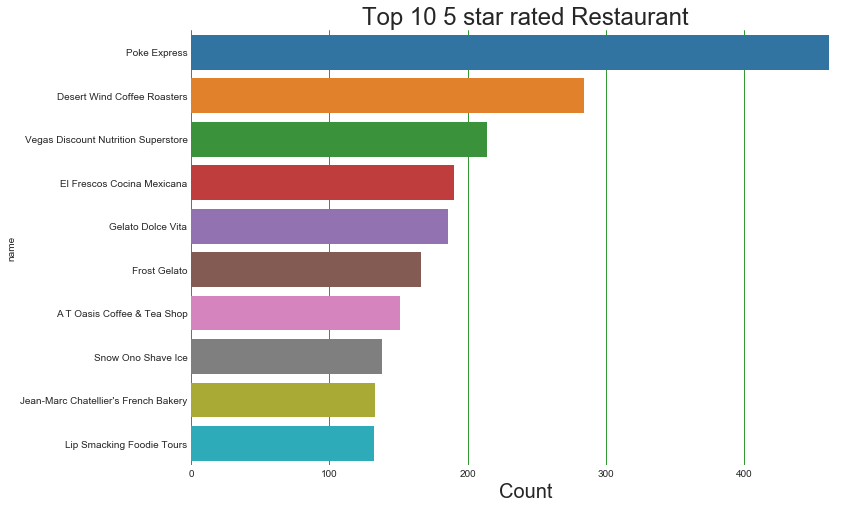

In [36]:
top_rated_restaurant = restaurant_df.sort_values(by=['stars','review_count'],
                                                 ascending=False)[['name','business_id','review_count','stars']]
#get top 10 5 star rated restaurant
n_top =10
top_rated_restaurant = top_rated_restaurant.nlargest(n_top, 'stars')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=top_rated_restaurant)
ax.set_xlabel('Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 10 5 star rated Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

Getting different food categories from the restaurant dataframe

In [37]:
top_rated_restaurant = restaurant_df.sort_values(by=['stars','review_count'],
                                                 ascending=False)[['name','business_id','review_count','stars']]
#top_rated_restaurant

In [38]:
def get_food_type_count(category):
    count = restaurant_df[restaurant_df['categories'].str.contains(category)==True]['business_id'].count()
    return count


In [39]:
food_dict = {}
food_categories = ['American','Italian','Mexican','Chinese','Thai','Indian','Japan','French']
for food_category in food_categories:
    food_dict[food_category] = get_food_type_count(food_category)
    


## Distribution of review count with respect to Food Categories
We can see American restaurant have higher count of reviews followed by Mexican

Text(0,0.5,'Count')

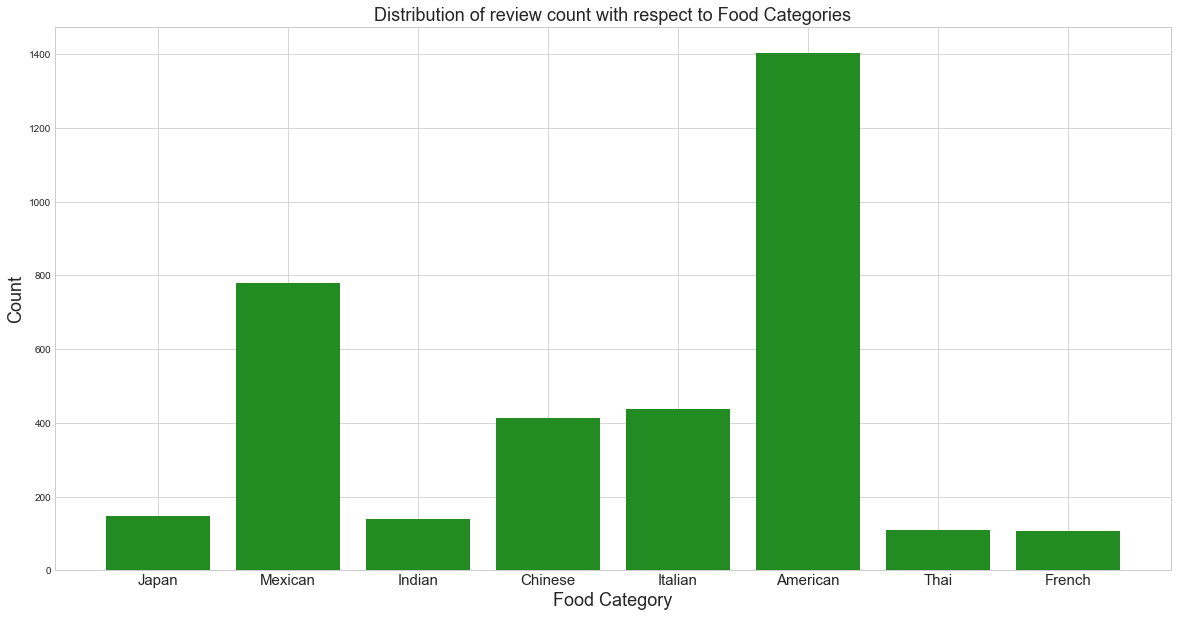

In [40]:
plt.figure(figsize=(20,10))
plt.bar(range(len(food_dict)), food_dict.values(), align='center',color='forestgreen')
plt.xticks(range(len(food_dict)), list(food_dict.keys()),fontsize = 15);
plt.title('Distribution of review count with respect to Food Categories',fontsize=18)
plt.xlabel('Food Category',fontsize=18)
plt.ylabel('Count',fontsize=18)


## Distribution(count) of American, Mexican, Italian, Chinese Restaurant rating
We can see American and Italian restaurants are rated higher than other restaurants

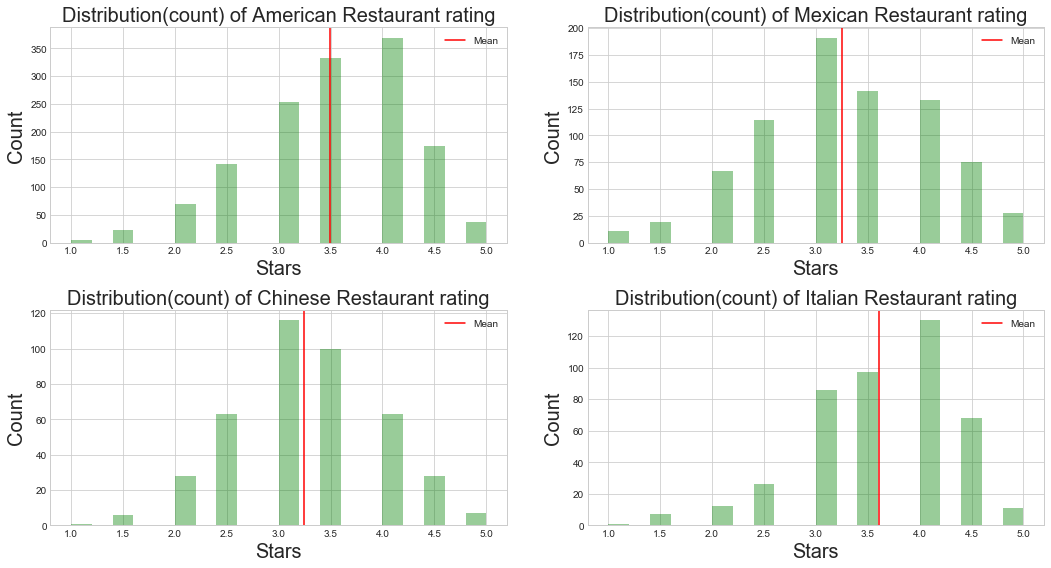

In [41]:
American_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('American')==True][['business_id','stars','categories','name','review_count']]
Mexican_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Mexican')==True][['business_id','stars','categories','name','review_count']]
Chinese_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Chinese')==True][['business_id','stars','categories','name','review_count']]
Italian_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Italian')==True][['business_id','stars','categories','name','review_count']]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.ravel()

def restaurant_category(df, title, ax):

    sns.distplot(df.stars,kde=False,color = 'g',ax =ax,bins=20);
    ax.axvline(df.stars.mean(), 0, 1, color='r', label='Mean')
    ax.legend();
    ax.set_ylabel('Count',size=20)
    ax.set_xlabel('Stars',size=20)
    ax.set_title('Distribution(count) of '+ title + ' Restaurant rating',size=20);

restaurant_category(American_restaurant_rating_df, 'American', ax[0])
restaurant_category(Mexican_restaurant_rating_df, 'Mexican', ax[1])
restaurant_category(Chinese_restaurant_rating_df, 'Chinese', ax[2])
restaurant_category(Italian_restaurant_rating_df, 'Italian', ax[3])

plt.tight_layout()

In [42]:
American_restaurant_rating_df.head(2)

,business_id,stars,categories,name,review_count
34,reWc1g65PNZnKz_Ub9QKOQ,2.5,"['Comfort Food', 'Canadian (New)', 'Restaurant...",Milestones Restaurants,51
55,Z1r6b30Tg0n0ME4-Zj2wQQ,3.0,"['American (Traditional)', 'Restaurants', 'Bar...",Boardwalk Place,13


## Top 20 American 5 star rated Restaurant

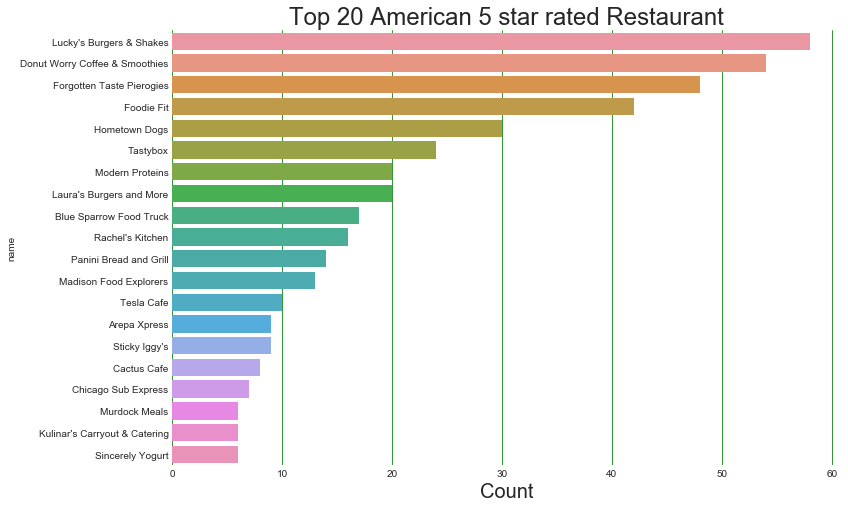

In [43]:
American_top_rated_restaurant = American_restaurant_rating_df.sort_values(by=['stars','review_count'],
                                                 ascending=False)[['name','business_id','review_count','stars']]
#get top 20 5 star rated restaurant
n_top =20
American_top_rated_restaurant = American_top_rated_restaurant.nlargest(n_top, 'stars')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=American_top_rated_restaurant)
ax.set_xlabel('Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 20 American 5 star rated Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

## High-count Top 10 users who reviewed Restaurant

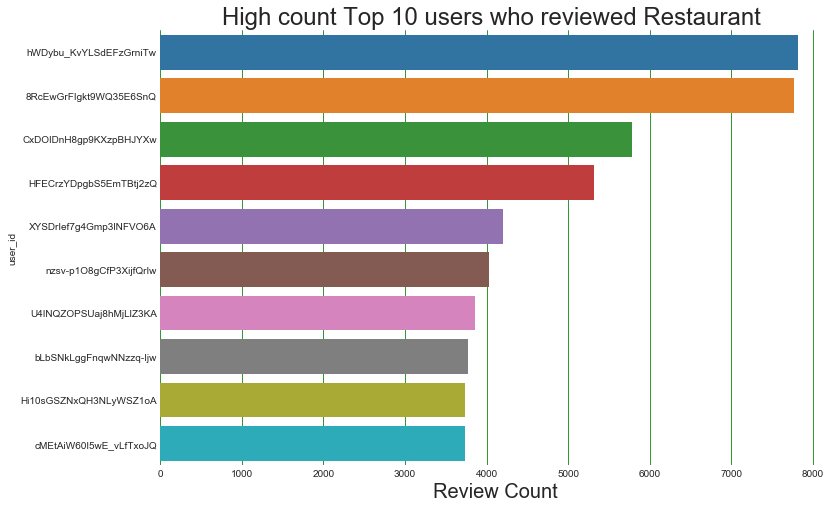

In [44]:

#get top 10 most reviewing users
n_top =10
most_review_user = user_df_filter_df.nlargest(n_top, 'review_count_y').reindex()
fig, ax = plt.subplots()
ax = sns.barplot(y="user_id", x="review_count_y", data=most_review_user)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("High count Top 10 users who reviewed Restaurant ",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)


## Distribution of Review Count given by users and given to Restaurant
We can see that most review count is with less number of users and restaurants

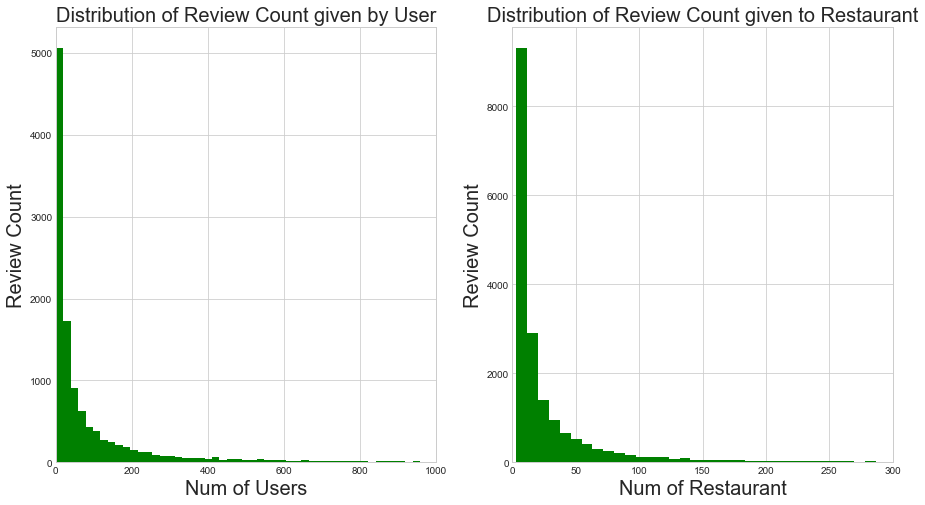

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
user_df_filter_df.review_count_y.hist(bins=400,ax=ax[0],color = 'g')
#plt.xlim([0,1000])
ax[0].legend();
ax[0].set_xlim([0,1000])
ax[0].set_ylabel('Review Count',size=20)
ax[0].set_xlabel('Num of Users',size=20)
ax[0].set_title('Distribution of Review Count given by User',size=20);

restaurant_df.review_count.hist(bins=400,ax=ax[1],color = 'g')
ax[1].set_xlim([0,300])
ax[1].legend();
ax[1].set_ylabel('Review Count',size=20)
ax[1].set_xlabel('Num of Restaurant',size=20)
ax[1].set_title('Distribution of Review Count given to Restaurant',size=20);
